In [226]:
import pycocotools
import os
import json
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from matplotlib.patches import Polygon

In [227]:
# Plot some images with their annotations 
def plot_images_with_annotations(dataset, coco, n_images=3):
    for i in range(n_images):
        img_id = random.choice(coco.getImgIds())
        img = coco.loadImgs(img_id)[0]
        image = cv2.imread(os.path.join(dataset, img['file_name']))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        ann_ids = coco.getAnnIds(imgIds=img['id'])
        anns = coco.loadAnns(ann_ids)
        coco.showAnns(anns)
        plt.show()

In [228]:
def plot_images_with_annotations_grid(dataset, coco, figsize=(20,15)):
    # Set grid dimensions
    rows, cols = 6, 4
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()  # Flatten axes for easy iteration

    # Get a random set of image IDs to display
    img_ids = random.sample(coco.getImgIds(), rows * cols)

    for i, img_id in enumerate(img_ids):
        img = coco.loadImgs(img_id)[0]
        image = cv2.imread(os.path.join(dataset, img['file_name']))
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Show image on current axis
        axes[i].imshow(image_rgb)
        axes[i].axis('off')

        # Get annotations for the current image
        ann_ids = coco.getAnnIds(imgIds=img['id'])
        anns = coco.loadAnns(ann_ids)

        # Manually draw annotations for each object
        for ann in anns:
            if 'segmentation' in ann:
                for seg in ann['segmentation']:
                    poly = np.array(seg).reshape((len(seg) // 2, 2))
                    polygon = Polygon(poly, fill=True, color='r', alpha=0.4)
                    axes[i].add_patch(polygon)

    # Hide any unused subplots
    for j in range(i + 1, rows * cols):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# CA Dataset

In [229]:
ca_path = "../Fine_tuned_Detectron2/data/Dataset/Dataset_CA"
ca_images_path = os.path.join(ca_path, "images")
ca_json_path = os.path.join(ca_path, "coco_format.json")


# Load the COCO dataset
ca = COCO(ca_json_path)

ca.info()

loading annotations into memory...
Done (t=0.09s)
creating index...
index created!
year: 2023
version: 1
description: Micro Plastic Dataset
contributor: Felix
url: 
date_created: 12/11/23


In [230]:
print("Total images in the dataset: ", len(ca.getImgIds()))
print("Total categories in the dataset: ", len(ca.getCatIds()))

Total images in the dataset:  1287
Total categories in the dataset:  2


In [231]:
print("Images in category 1: ", len(ca.getImgIds(catIds=[1])))
print("Images in category 2: ", len(ca.getImgIds(catIds=[2])))

Images in category 1:  578
Images in category 2:  709


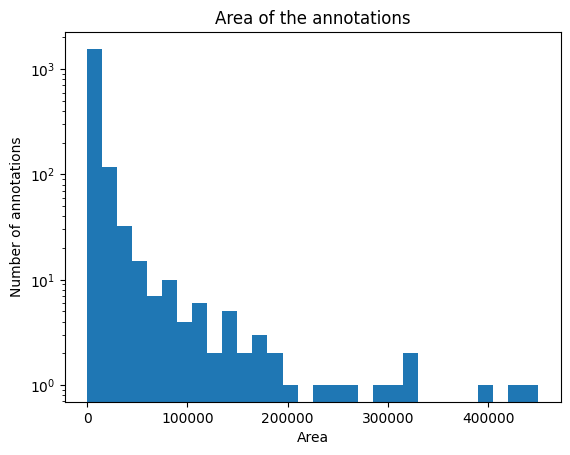

In [232]:
ca_area_anns = [ann['area'] for ann in ca.loadAnns(ca.getAnnIds())]
plt.hist(ca_area_anns, bins=30, log=True)
plt.xlabel('Area')
plt.ylabel('Number of annotations')
plt.title('Area of the annotations')
plt.show()

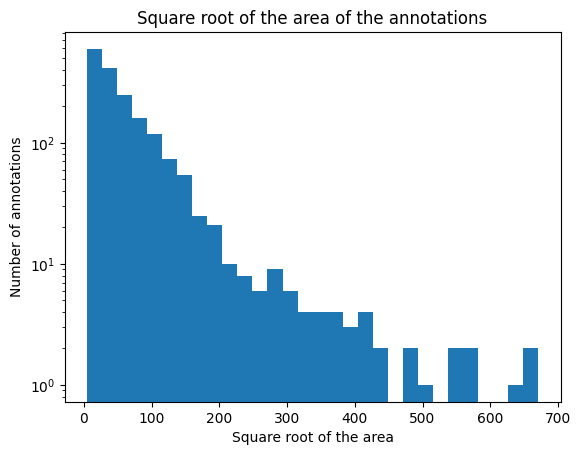

In [233]:
ca_area_squrd_anns = [ann['area']**0.5 for ann in ca.loadAnns(ca.getAnnIds())]
plt.hist(ca_area_squrd_anns, bins=30, log=True)
plt.xlabel('Square root of the area')
plt.ylabel('Number of annotations')
plt.title('Square root of the area of the annotations')
plt.show()

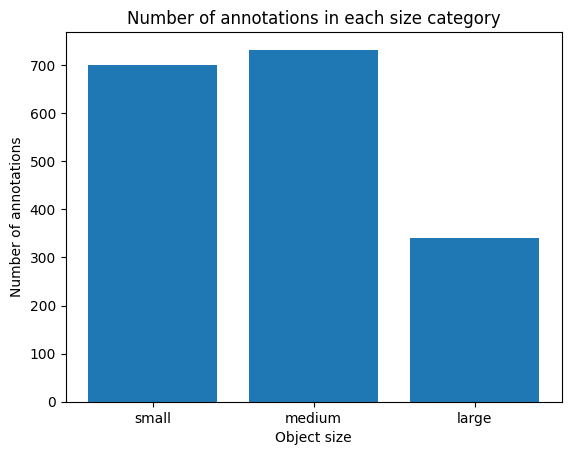

In [234]:
# Given that objects are small if their area < 32^2, medium if 32^2 < area < 96^2, and large if area > 96^2, we can plot the number of annotations in each category
small = 0
medium = 0
large = 0
for ann in ca.loadAnns(ca.getAnnIds()):
    if ann['area'] < 32**2:
        small += 1
    elif ann['area'] < 96**2:
        medium += 1
    else:
        large += 1

plt.bar(['small', 'medium', 'large'], [small, medium, large])
plt.xlabel('Object size')
plt.ylabel('Number of annotations')
plt.title('Number of annotations in each size category')
plt.show()

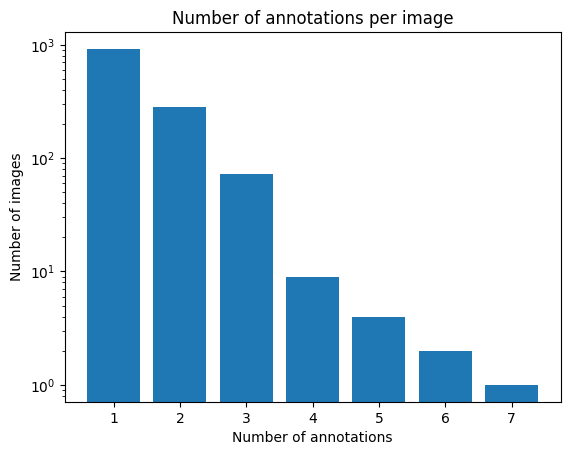

In [235]:
# Plot the number of annotations per image
anns_per_image = [len(ca.getAnnIds(imgIds=[img_id])) for img_id in ca.getImgIds()]
anns_count = [anns_per_image.count(i) for i in range(1, 8)]
plt.bar(range(1, 8), anns_count, log=True)
plt.xlabel('Number of annotations')
plt.ylabel('Number of images')
plt.title('Number of annotations per image')
plt.show()

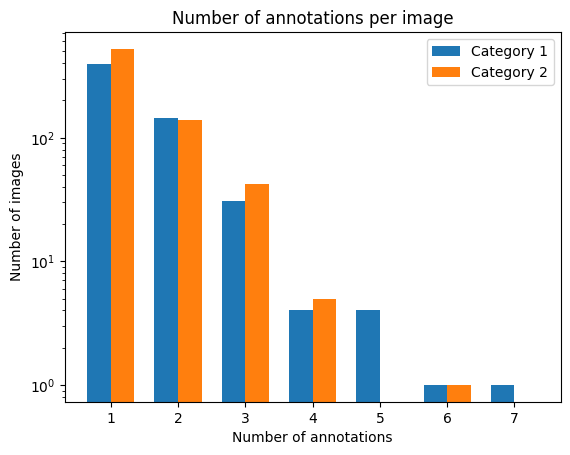

In [236]:
anns_per_image_cat1 = [len(ca.getAnnIds(imgIds=[img_id], catIds=[1])) for img_id in ca.getImgIds(catIds=[1])]
anns_per_image_cat2 = [len(ca.getAnnIds(imgIds=[img_id], catIds=[2])) for img_id in ca.getImgIds(catIds=[2])]

anns_count_cat1 = [anns_per_image_cat1.count(i) for i in range(1, 8)]
anns_count_cat2 = [anns_per_image_cat2.count(i) for i in range(1, 8)]

bar_width = 0.35
x = np.arange(1, 8)

plt.bar(x - bar_width/2, anns_count_cat1, width=bar_width, label='Category 1', log=True)
plt.bar(x + bar_width/2, anns_count_cat2, width=bar_width, label='Category 2', log=True)

plt.xlabel('Number of annotations')
plt.ylabel('Number of images')
plt.title('Number of annotations per image')
plt.xticks(x)
plt.legend()
plt.show()


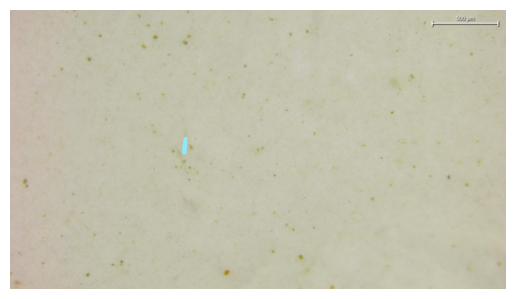

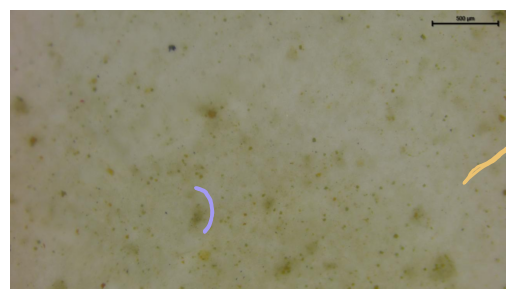

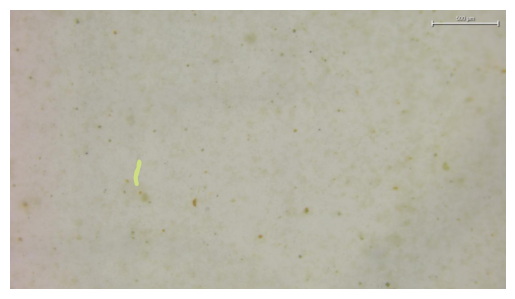

In [237]:
plot_images_with_annotations(ca_images_path, ca, n_images=3)

In [238]:
plot_images_with_annotations_grid(ca_images_path, ca, n_images=24)

TypeError: plot_images_with_annotations_grid() got an unexpected keyword argument 'n_images'

# Dataset Vidrio

In [ ]:
vidrio_path = "../Fine_tuned_Detectron2/data/Dataset/Dataset_vidrio"
vidrio_images_path = os.path.join(vidrio_path, "images")
vidrio_json_path = os.path.join(vidrio_path, "coco_format.json")

# Load the COCO dataset
vidrio = COCO(vidrio_json_path)

vidrio.info()

loading annotations into memory...
Done (t=0.14s)
creating index...
index created!
year: 2023
version: 1
description: Micro Plastic Dataset
contributor: Felix
url: 
date_created: 12/11/23


In [ ]:
print("Total images in the dataset: ", len(vidrio.getImgIds()))
print("Total categories in the dataset: ", len(vidrio.getCatIds()))

Total images in the dataset:  1661
Total categories in the dataset:  2


In [ ]:
print("Images in category 1: ", len(vidrio.getImgIds(catIds=[1])))
print("Images in category 2: ", len(vidrio.getImgIds(catIds=[2])))

Images in category 1:  489
Images in category 2:  714


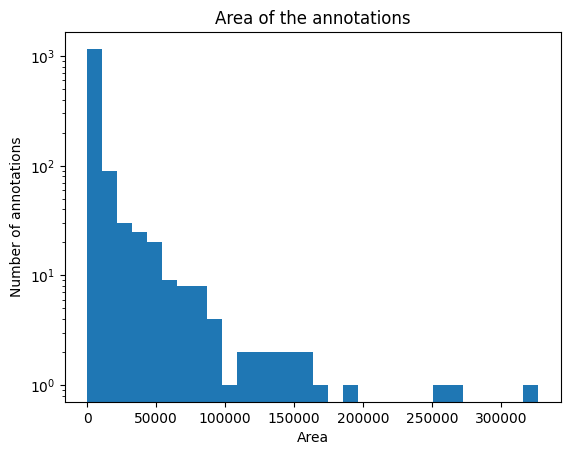

In [ ]:
vidrio_area_anns = [ann['area'] for ann in vidrio.loadAnns(vidrio.getAnnIds())]
plt.hist(vidrio_area_anns, bins=30, log=True)
plt.xlabel('Area')
plt.ylabel('Number of annotations')
plt.title('Area of the annotations')
plt.show()

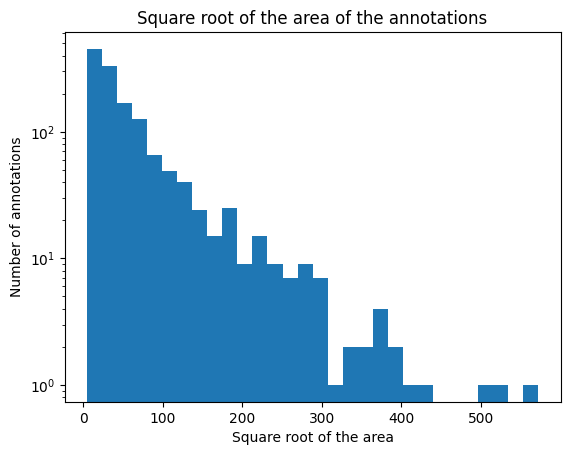

In [ ]:
vidrio_area_squrd_anns = [ann['area']**0.5 for ann in vidrio.loadAnns(vidrio.getAnnIds())]
plt.hist(vidrio_area_squrd_anns, bins=30, log=True)
plt.xlabel('Square root of the area')
plt.ylabel('Number of annotations')
plt.title('Square root of the area of the annotations')
plt.show()

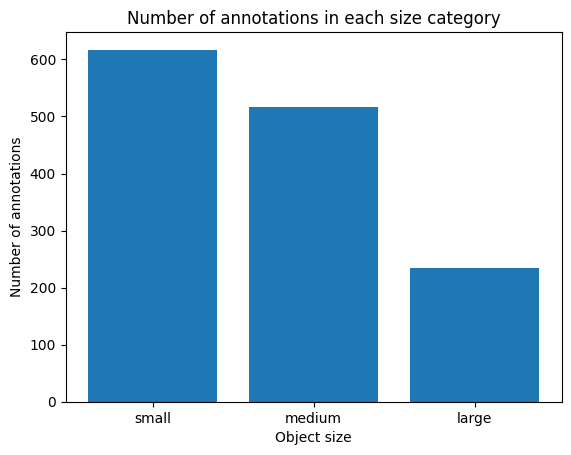

In [ ]:
# Given that objects are small if their area < 32^2, medium if 32^2 < area < 96^2, and large if area > 96^2, we can plot the number of annotations in each category
small = 0
medium = 0
large = 0
for ann in vidrio.loadAnns(vidrio.getAnnIds()):
    if ann['area'] < 32**2:
        small += 1
    elif ann['area'] < 96**2:
        medium += 1
    else:
        large += 1

plt.bar(['small', 'medium', 'large'], [small, medium, large])
plt.xlabel('Object size')
plt.ylabel('Number of annotations')
plt.title('Number of annotations in each size category')
plt.show()

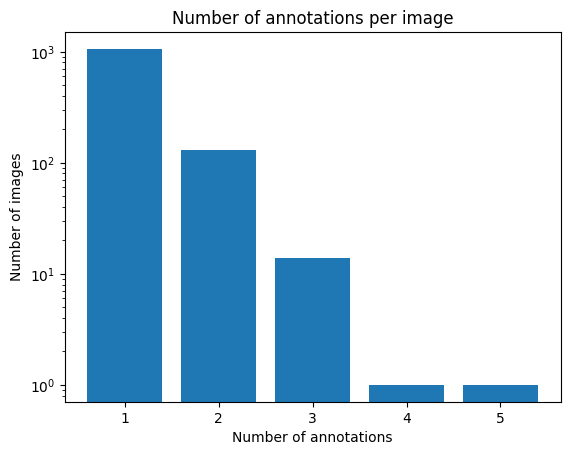

In [ ]:
# Plot the number of annotations per image
anns_per_image = [len(vidrio.getAnnIds(imgIds=[img_id])) for img_id in vidrio.getImgIds()]
anns_count = [anns_per_image.count(i) for i in range(1, 6)]
plt.bar(range(1, 6), anns_count, log=True)
plt.xlabel('Number of annotations')
plt.ylabel('Number of images')
plt.title('Number of annotations per image')
plt.show()

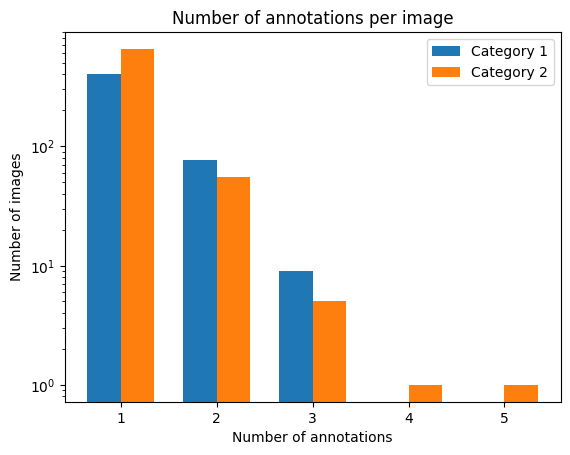

In [ ]:
anns_per_image_cat1 = [len(vidrio.getAnnIds(imgIds=[img_id], catIds=[1])) for img_id in vidrio.getImgIds(catIds=[1])]
anns_per_image_cat2 = [len(vidrio.getAnnIds(imgIds=[img_id], catIds=[2])) for img_id in vidrio.getImgIds(catIds=[2])]

anns_count_cat1 = [anns_per_image_cat1.count(i) for i in range(1, 6)]
anns_count_cat2 = [anns_per_image_cat2.count(i) for i in range(1, 6)]

bar_width = 0.35
x = np.arange(1, 6)

plt.bar(x - bar_width/2, anns_count_cat1, width=bar_width, label='Category 1', log=True)
plt.bar(x + bar_width/2, anns_count_cat2, width=bar_width, label='Category 2', log=True)

plt.xlabel('Number of annotations')
plt.ylabel('Number of images')
plt.title('Number of annotations per image')
plt.xticks(x)
plt.legend()
plt.show()

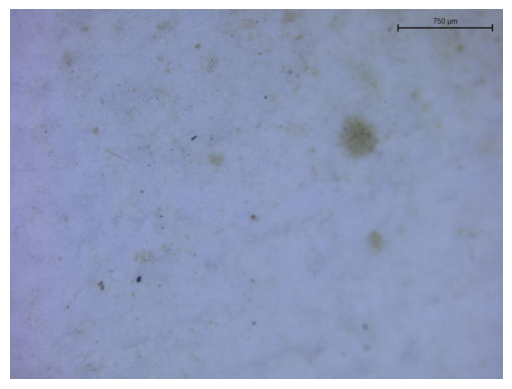

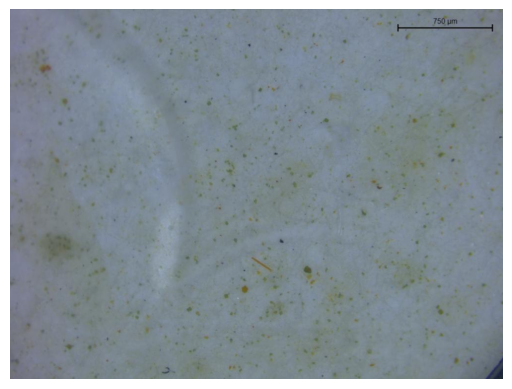

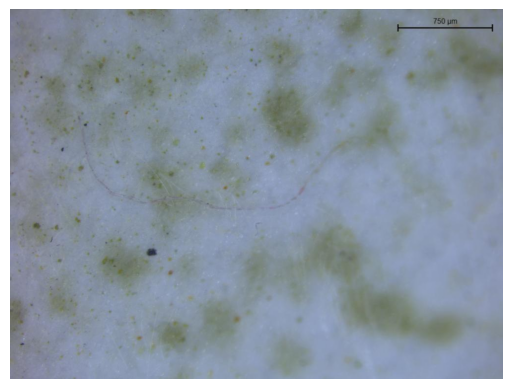

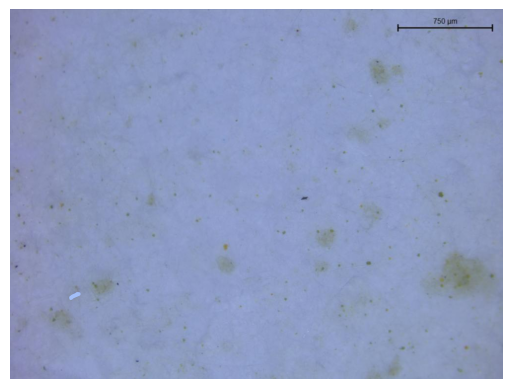

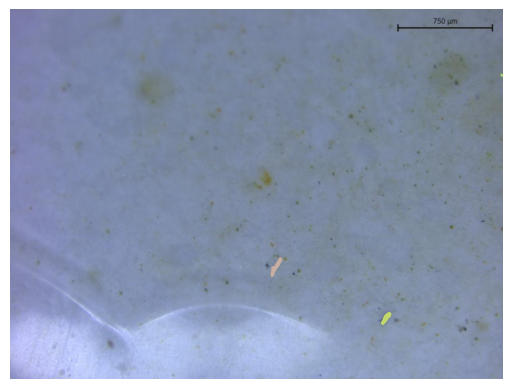

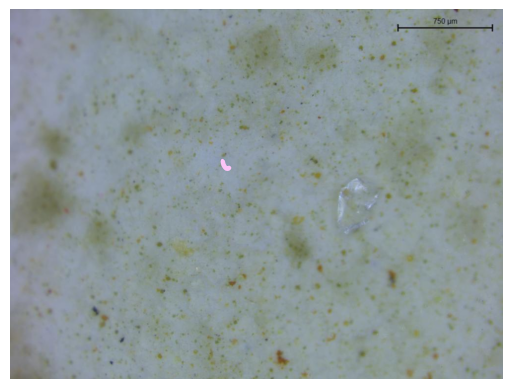

In [ ]:
plot_images_with_annotations(vidrio_images_path, vidrio, n_images=3)

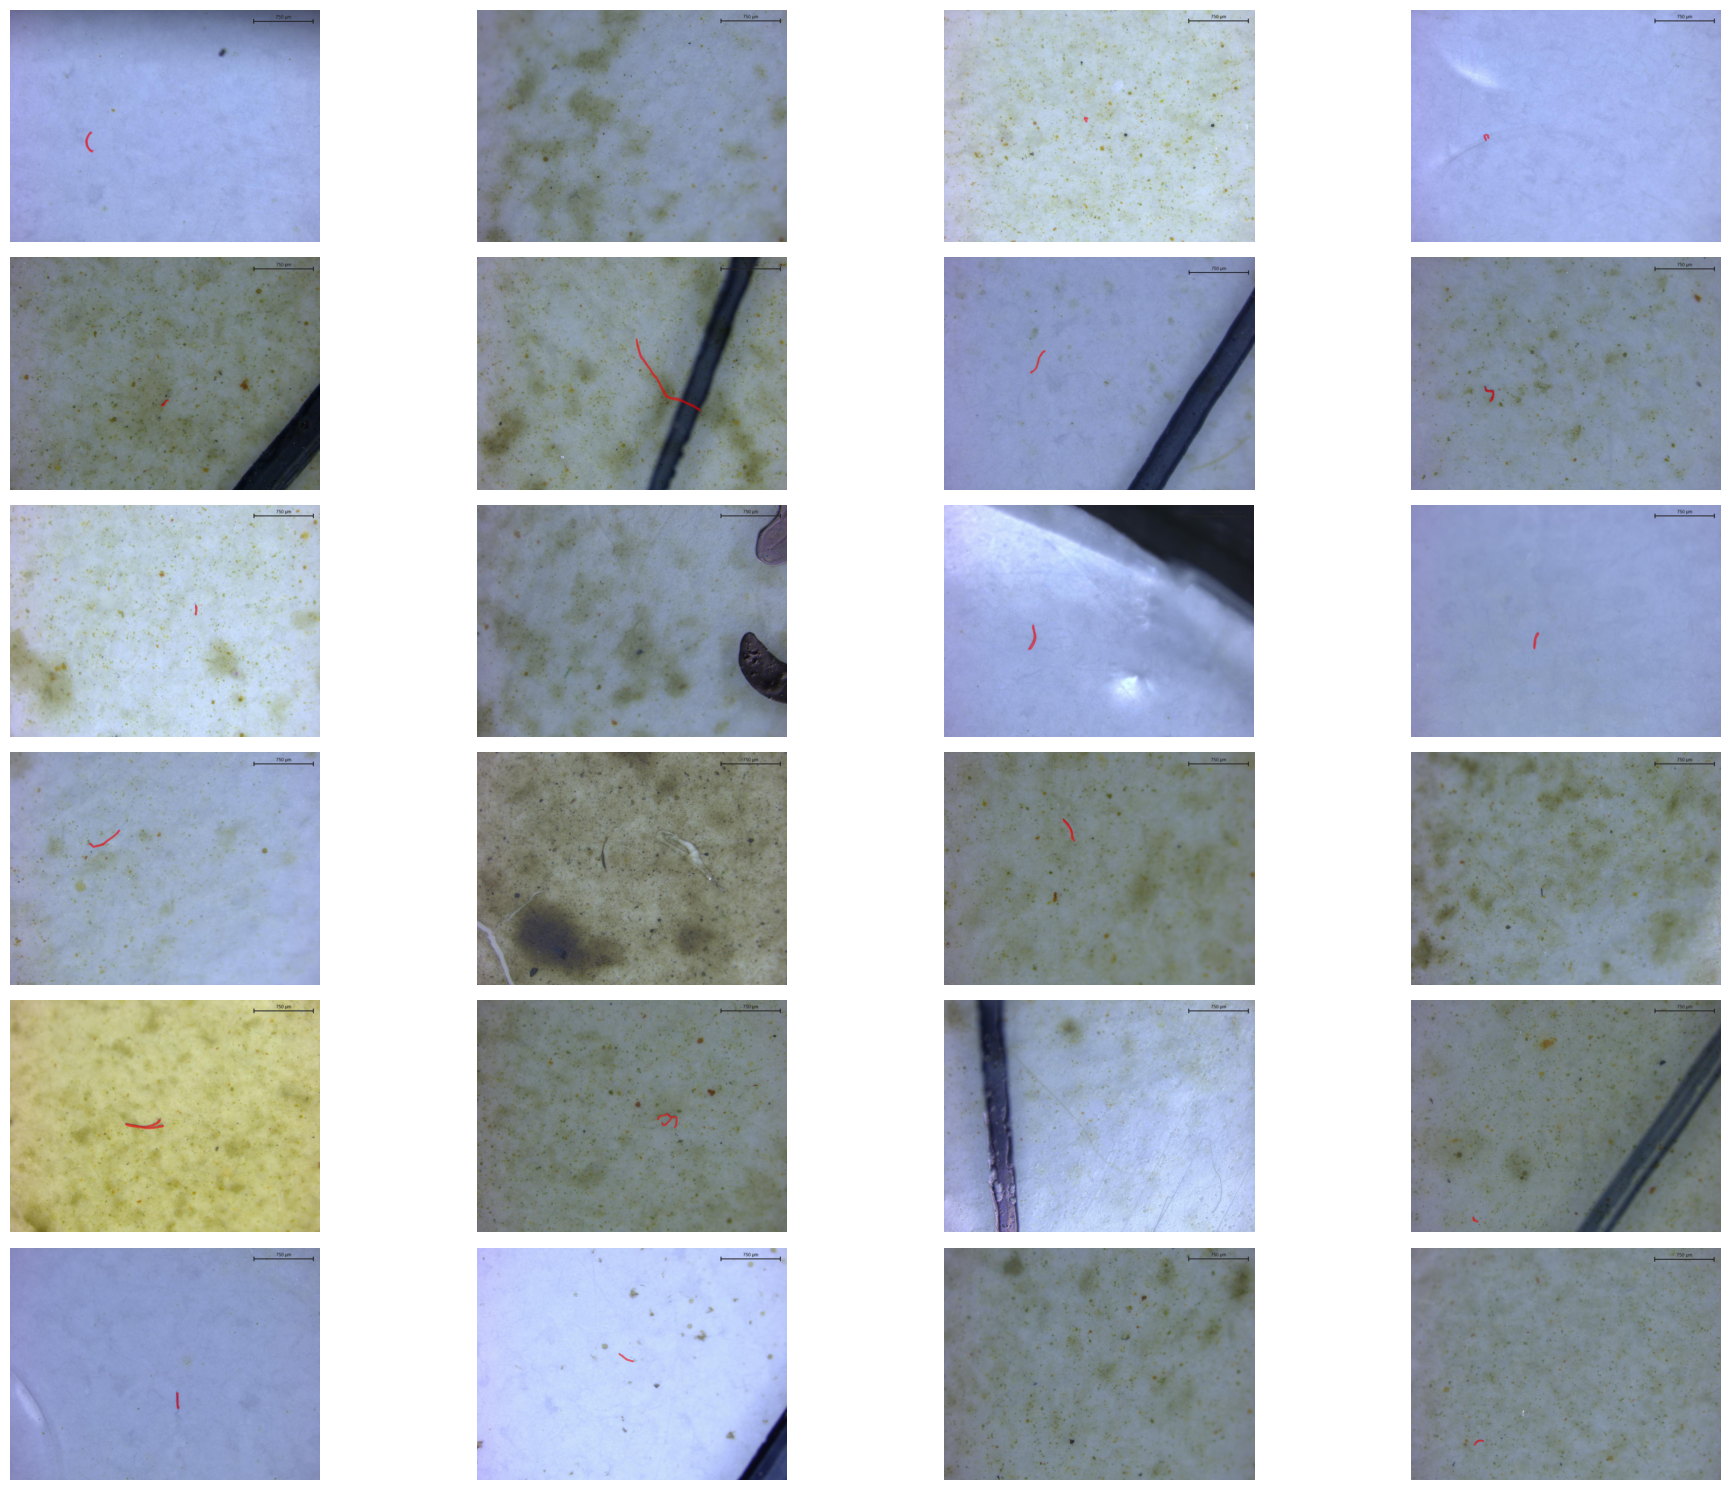

In [ ]:
plot_images_with_annotations_grid(vidrio_images_path, vidrio, n_images=24)